# Práctica 1 - Procesamiento de Imágenes


*   Lorenzo Gandolfo (169/21)
*   Malena Sol Alamo (1620/21)
*   Victoria Klimkowsky (1390/21)



## Importamos la imagen que vamos a utilizar


Imagen: https://wilberzada.com/blog/fotos-blanco-negro-con-iphone/

No la adjuntamos como archivo en el campus porque no nos dejaba subir 2 cosas

In [304]:
# Importamos librerias

from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

In [305]:
imagen = Image.open('trompetista-byn.jpg')
imagen = imagen.convert('L')
imagen = np.array(imagen)

La imagen posee 450 filas y 700 columnas, con un valores del 0 al 255 indicando la escala de gris del píxel.

In [306]:
imagen.shape

(450, 700)

## Multiplicación por un entero

Para analizar los resultados de multiplicar la imagen por un entero seguimos la siguiente estrategia:
1. Normalizamos la escala llevando los valores al rango [0,1]
2. Multiplicamos los valores por el entero y aquellos que se van del rango los forzamos a ser 1.
3. Nuevamente llevamos los valores al rango [0,255]
4. Devolvemos el resultado

Para el paso 2 usamos la función np.clip de la librería numpy que encuentra los valores >1 y los convierte en 1 de manera optimizada.

In [307]:
def multiplicacion(n, imagen):
    # Normalizacion
    imagen_normalizada = imagen / 255.0

    # Multiplicacion
    multiplicacion = imagen_normalizada * n

    # Forzamos los valores >1 a ser 1
    multiplicacion = np.clip(multiplicacion, 0, 1)

    # Devolvemos el resultado
    multiplicacion = multiplicacion * 255
    return multiplicacion.astype(np.uint8)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
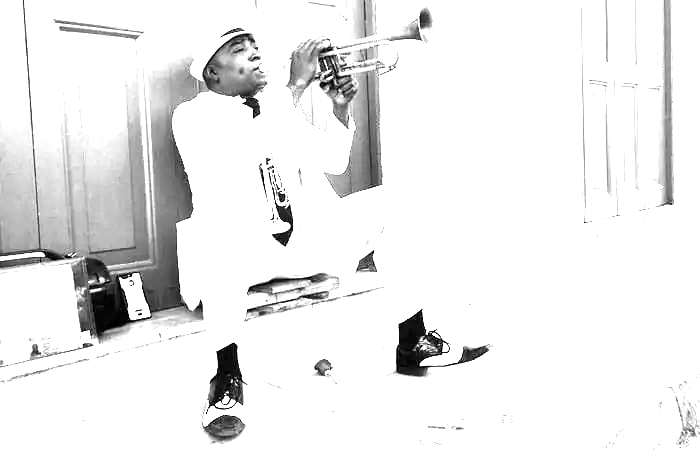

In [308]:
# Resultado multiplicando por 3
multiplicacion(3,imagen)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
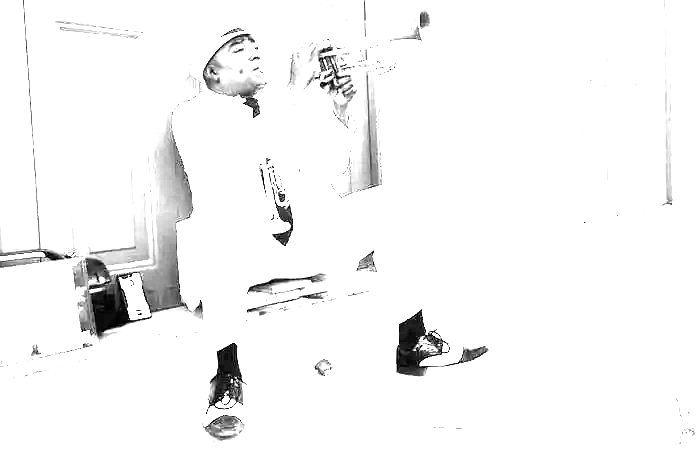

In [309]:
# Resultado multiplicando por 5
multiplicacion(5,imagen)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
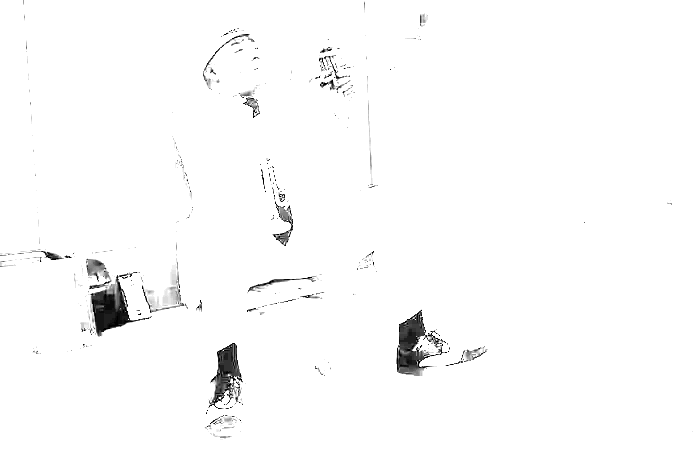

In [310]:
# Resultado multiplicando por 10
multiplicacion(10,imagen)

Conclusión: La multiplicación*n aclara todos los valores con una intensidad n.

## Negativo

Para devolver el negativo de una función, le restamos el valor a 255. De esa manera pasamos los oscuros a claros y los claros a oscuros.

In [311]:
def negativo_imagen(imagen):
  negativo = 255 - imagen
  return negativo

array([[140, 140, 140, ...,  68,  61,  56],
       [140, 140, 140, ...,  68,  61,  56],
       [140, 140, 140, ...,  68,  61,  56],
       ...,
       [ 92, 108, 113, ..., 118, 108, 104],
       [ 97, 100, 107, ..., 133, 125, 127],
       [ 97, 100, 107, ..., 142, 134, 136]], dtype=uint8)
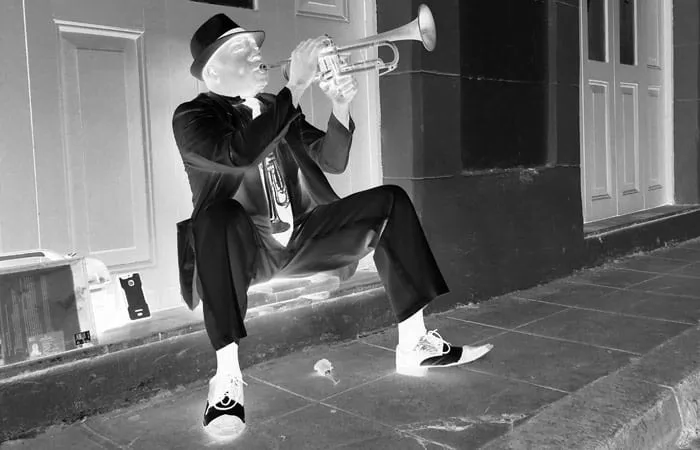

In [312]:
negativo_imagen(imagen)

## Histograma

Creamos una función para armar el histograma de los niveles de gris a mano.

In [313]:
def frecuencias(imagen):
  frecuencias = np.zeros(256)

  # Sumamos a cada frecuencia la cantidad de valores
  for valor in imagen.flatten():
    frecuencias[valor]+=1
  return frecuencias

def plotear_histograma(cantidad_histograma):
  # Ploteamos el histograma como un gráfico de barras de la frecuencia
  x_bins = np.linspace(0, 255, len(cantidad_histograma) + 1)
  plt.figure(figsize=(10,6))
  plt.bar(x_bins[:-1], cantidad_histograma, width=np.diff(x_bins), edgecolor="black", align="edge")
  plt.xticks(x_bins,rotation=45)
  return 0


def calculo_histograma(frecuencias,bins):
  cantidad_bin = 256//bins
  cantidad_histograma = []
  cantidad_histograma = np.zeros(bins, dtype=int)

  # Cuento la cantidad por bin
  for i in range(bins):
      start = i * cantidad_bin
      end = (i + 1) * cantidad_bin
      cantidad_histograma[i] = np.sum(frecuencias[start:end])

  # Ajusto si el redondeo me deja valores afuera
  if bins * cantidad_bin < 256:
     cantidad_histograma[-1] += np.sum(frecuencias[bins * cantidad_bin:])

  return cantidad_histograma

def histograma(imagen,bins):
  return plotear_histograma(calculo_histograma(frecuencias(imagen),bins))

0

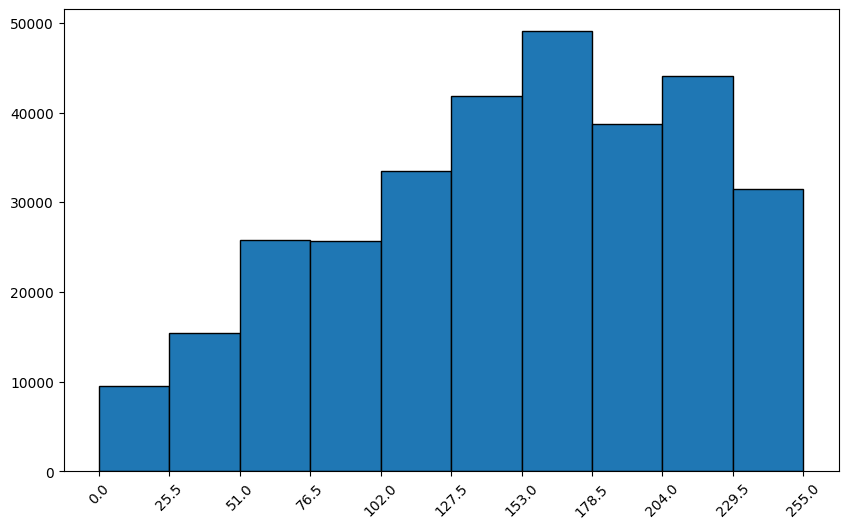

In [314]:
histograma(imagen,10)

## Aumento contraste

Aumento del contraste: oscurecemos los valores que son más chicos que r1 y aclaramos los valores que son mas altos que r2.

In [315]:
def aumento_contraste(imagen, r1, r2):

    # Inicializamos una copia de la imagen para modificarla
    resultado = np.copy(imagen)

    # Normalizamos para que los valores esten entre 0 y 1
    resultado=resultado/255
    imagen=imagen/255

    # Normalizamos tambien los umbrales
    r1 = r1/255
    r2 = r2/255

    # Condiciones para modificar la imagen
    dentro_rango = (imagen >= r1) & (imagen <= r2)
    por_debajo_r1 = imagen < r1
    por_encima_r2 = imagen > r2

    # Aplicamos transformaciones
    resultado[por_debajo_r1] = imagen[por_debajo_r1] / 2
    resultado[por_encima_r2] = imagen[por_encima_r2] * 2

    # Devolvemos la imagen
    resultado = resultado * 255
    resultado = resultado.clip(0, 255).astype(np.uint8)

    return resultado

array([[115, 115, 115, ..., 255, 255, 255],
       [115, 115, 115, ..., 255, 255, 255],
       [115, 115, 115, ..., 255, 255, 255],
       ...,
       [255, 147, 142, ..., 137, 147, 255],
       [255, 255, 148, ..., 122, 130, 128],
       [255, 255, 148, ..., 113, 121, 119]], dtype=uint8)
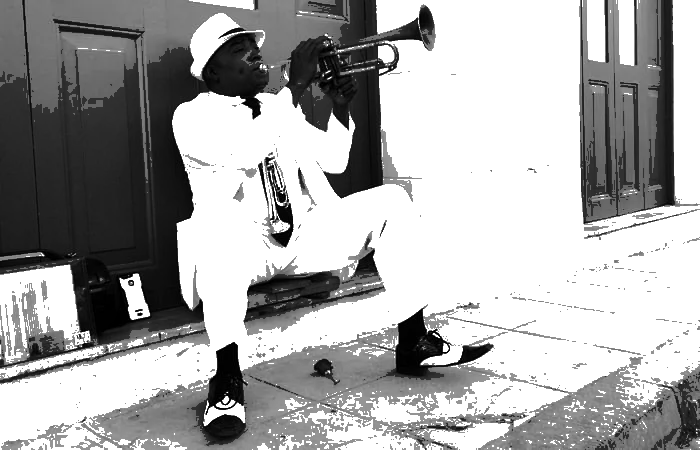

In [316]:
# Ejemplo de aumento de contraste
aumento_contraste(imagen, 100, 150)

Miramos el histograma de la imagen elegida y elegimos a ojo r1=50 y r2=225.

0

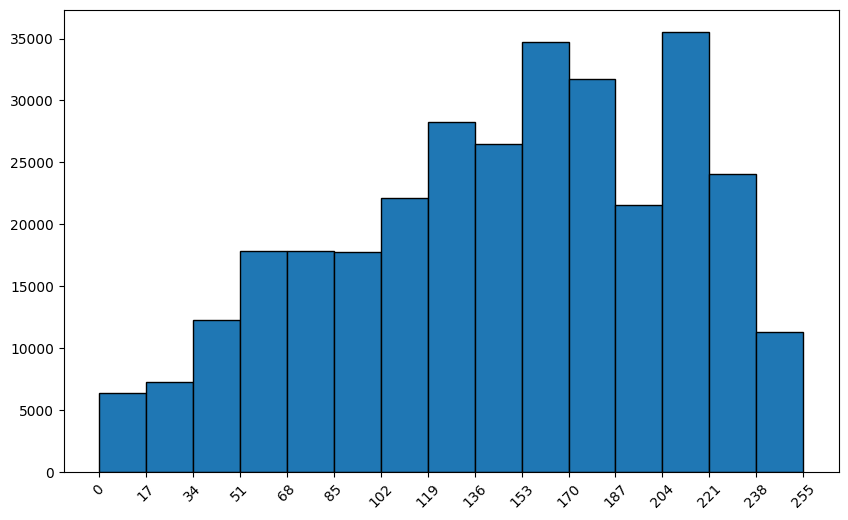

In [317]:
histograma(imagen,15)

array([[115, 115, 115, ..., 187, 194, 199],
       [115, 115, 115, ..., 187, 194, 199],
       [115, 115, 115, ..., 187, 194, 199],
       ...,
       [163, 147, 142, ..., 137, 147, 151],
       [158, 155, 148, ..., 122, 130, 128],
       [158, 155, 148, ..., 113, 121, 119]], dtype=uint8)
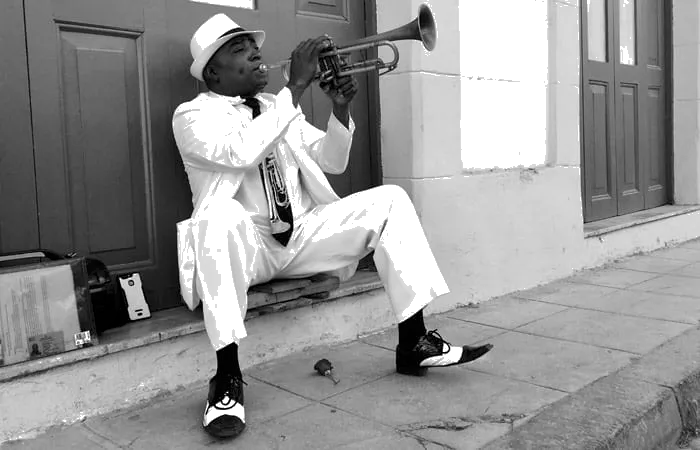

In [318]:
aumento_contraste(imagen,15,220)

## Binarizacion

Binarizamos la imagen usando un umbral de binarizacion. Todos los valores por debajo del umbral se van a 0, y todos los valores por encima se van a 255.

In [319]:
def binarizacion(imagen, u):

    # Inicializa una copia de la imagen para modificarla
    resultado = np.copy(imagen)

    # Normalizacion
    resultado=resultado/255
    imagen=imagen/255
    u = u/255

    # Condiciones para modificar la imagen
    por_debajo_u = imagen < u
    por_encima_u = imagen >= u

    # Aplicar transformaciones
    resultado[por_debajo_u] = 0
    resultado[por_encima_u] = 255

    resultado = resultado.astype(np.uint8)
    return resultado

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0]], dtype=uint8)
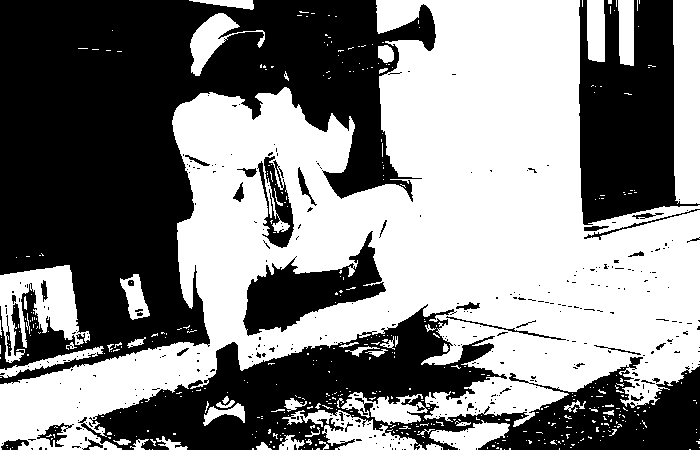

In [320]:
# Ejemplo de binarizacion
binarizacion(imagen,150)

Para encontrar un valor correcto de binarizacion usamos dos estrategias: miramos el histograma, usamos la mediana, usamos el promedio y el valor 127 (la mitad de 255)

0

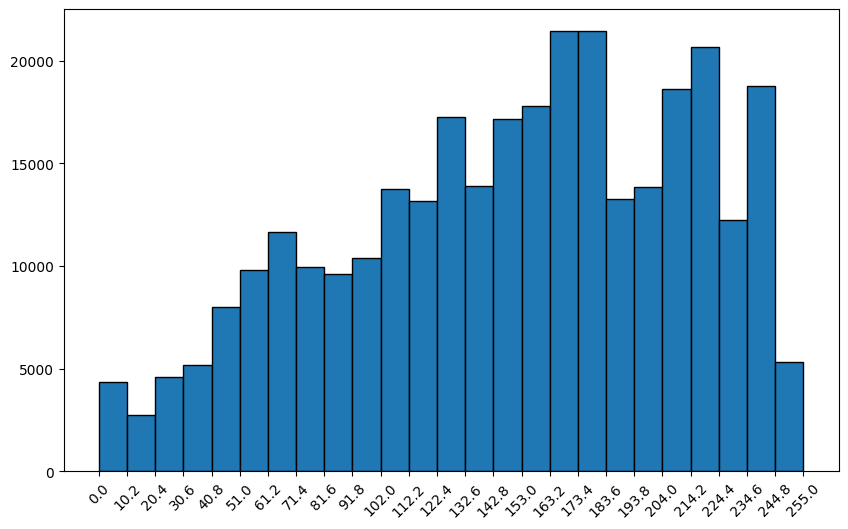

In [321]:
histograma(imagen,25)

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0]], dtype=uint8)
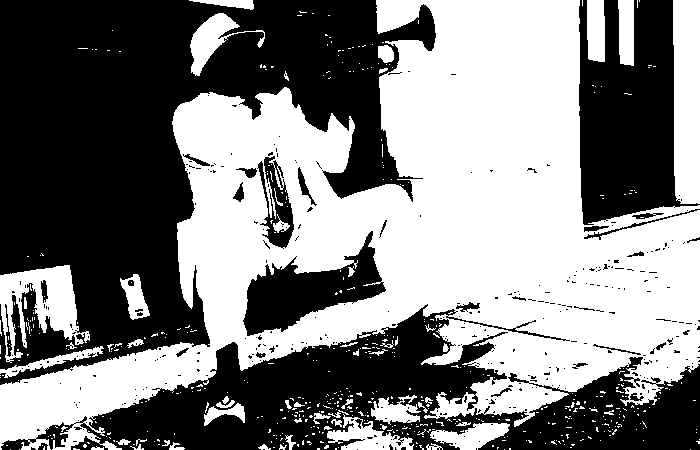

In [322]:
binarizacion(imagen,153)

La mediana es 153.0


array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0]], dtype=uint8)
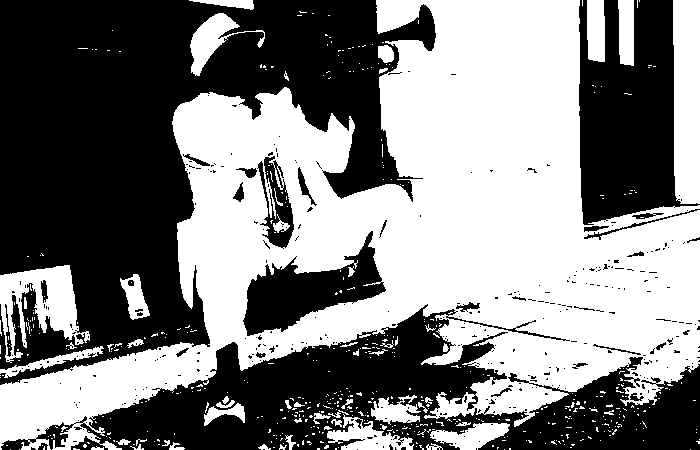

In [323]:
median = np.median(imagen)
print("La mediana es",median)
binarizacion(imagen,median)

La media es 145.51023174603174


array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ...,   0, 255, 255],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)
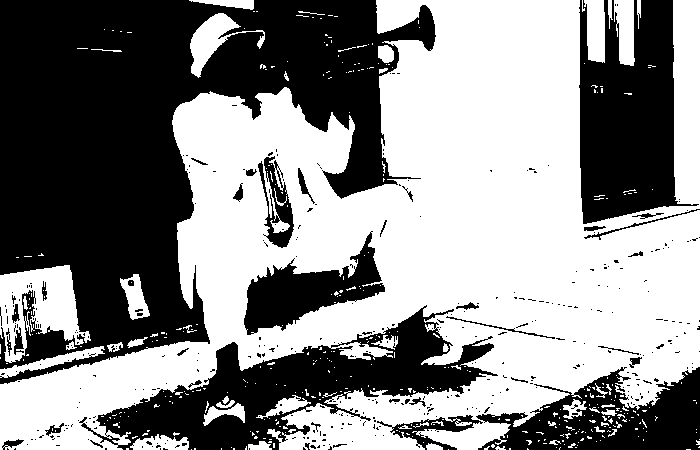

In [324]:
mean = np.mean(imagen)
print("La media es",mean)
binarizacion(imagen,mean)

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)
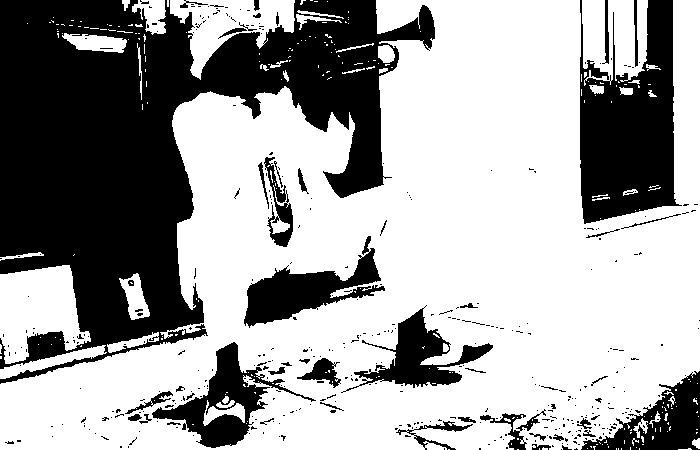

In [325]:
binarizacion(imagen,127)

El valor que elegimos a ojo es casualmente la media. Vemos que es similar a la mediana, por lo que nos da una pista de que los datos estan distribuidos de manera pareja.

## Ecualizacion histograma

In [326]:
def ecualizacion(frecuencia):
  s = []  # Lista para almacenar los valores del CDF normalizado

  # Paso 1: Calcular el primer valor del CDF normalizado
  s.append(frecuencia[0] / sum(frecuencia))

  # Paso 2: Calcular los siguientes valores del CDF normalizado
  for i in range(1, 256):
      s.append(s[i-1] + frecuencia[i] / sum(frecuencia))
  return s

def histograma_ecualizado(imagen,bins):
  frecuencia = frecuencias(imagen)  # Obtener el vector de frecuencias
  return plotear_histograma(calculo_histograma(ecualizacion(frecuencia),bins))

0

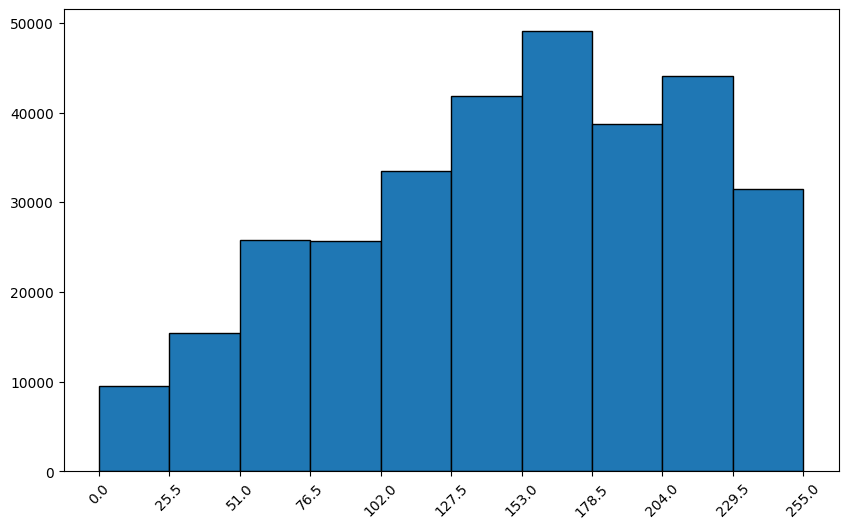

In [327]:
histograma(imagen,10)

0

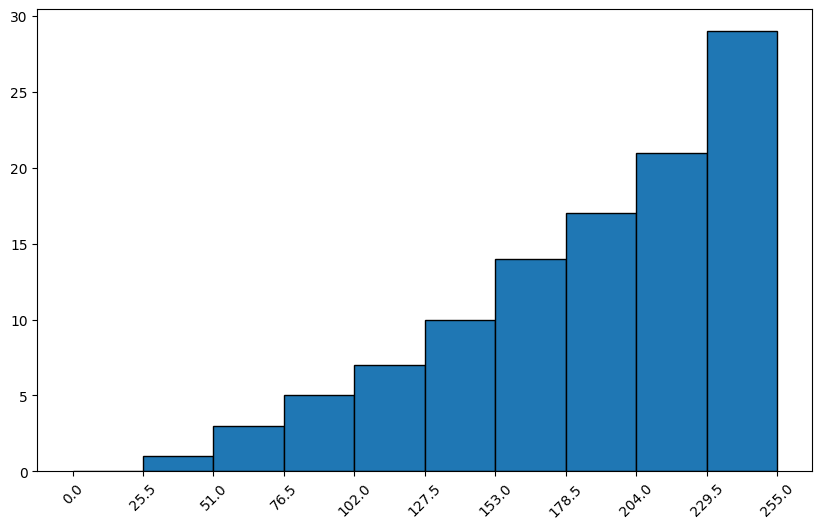

In [328]:
histograma_ecualizado(imagen,10)

In [329]:
# Imagen ecualizada
len(ecualizacion(imagen))

256

##Ecualizacion dos veces del histograma


In [330]:
def ecualizo_dos_veces(ima):
  s = ecualizacion(frecuencias(imagen))

  # Convertir los valores de s al rango [0, 255]
  s = np.array(s) * 255
  s = s.astype('uint8')  # Convertir a enteros de 8 bits

  # Crear la imagen ecualizada utilizando el CDF
  ima_ecualizada = s[ima]

  ## Muestro las imagenes y sus histogramas
  fig, axs = plt.subplots(3, 2, figsize=(15, 10))
  axs[0,0].imshow(imagen, cmap='gray')
  axs[0,0].set_title('Imagen Original')
  axs[0,0].axis('off')

  histograma_normal = calculo_histograma(frecuencias(imagen),10)
  x_bins = np.linspace(0, 255, len(histograma_normal) + 1)
  axs[0,1].bar(x_bins[:-1], histograma_normal, width=np.diff(x_bins), edgecolor="black", align="edge")
  axs[0,1].set_xticks(x_bins)
  axs[0,1].set_title('Histograma de la imagen original')

  axs[1,0].imshow(ima_ecualizada, cmap='gray')
  axs[1,0].set_title('Imagen Ecualizada')
  axs[1,0].axis('off')

  axs[1,1].bar(x_bins[:-1], calculo_histograma(frecuencias(ima_ecualizada),10), width=np.diff(x_bins), edgecolor="black", align="edge")
  axs[1,1].set_xticks(x_bins)
  axs[1,1].set_title('Histograma de la imagen ecualizada')

  s2 = ecualizacion(frecuencias(ima_ecualizada))
  s2 = np.array(s2) * 255
  s2 = s2.astype('uint8')
  ima_ecualizada2 = s2[ima_ecualizada]


  axs[2,0].imshow(ima_ecualizada2, cmap='gray')
  axs[2,0].set_title('Imagen Ecualizada 2 veces')
  axs[2,0].axis('off')

  axs[2,1].bar(x_bins[:-1], calculo_histograma(frecuencias(ima_ecualizada2),10), width=np.diff(x_bins), edgecolor="black", align="edge")
  axs[2,1].set_xticks(x_bins)
  axs[2,1].set_title('Histograma de la imagen ecualizada 2 veces')

  plt.show()

No cambia mucho la imagen al ecualizar dos veces pues los grises ya se distribuyeron uniformemente al ecualizarse por primera vez



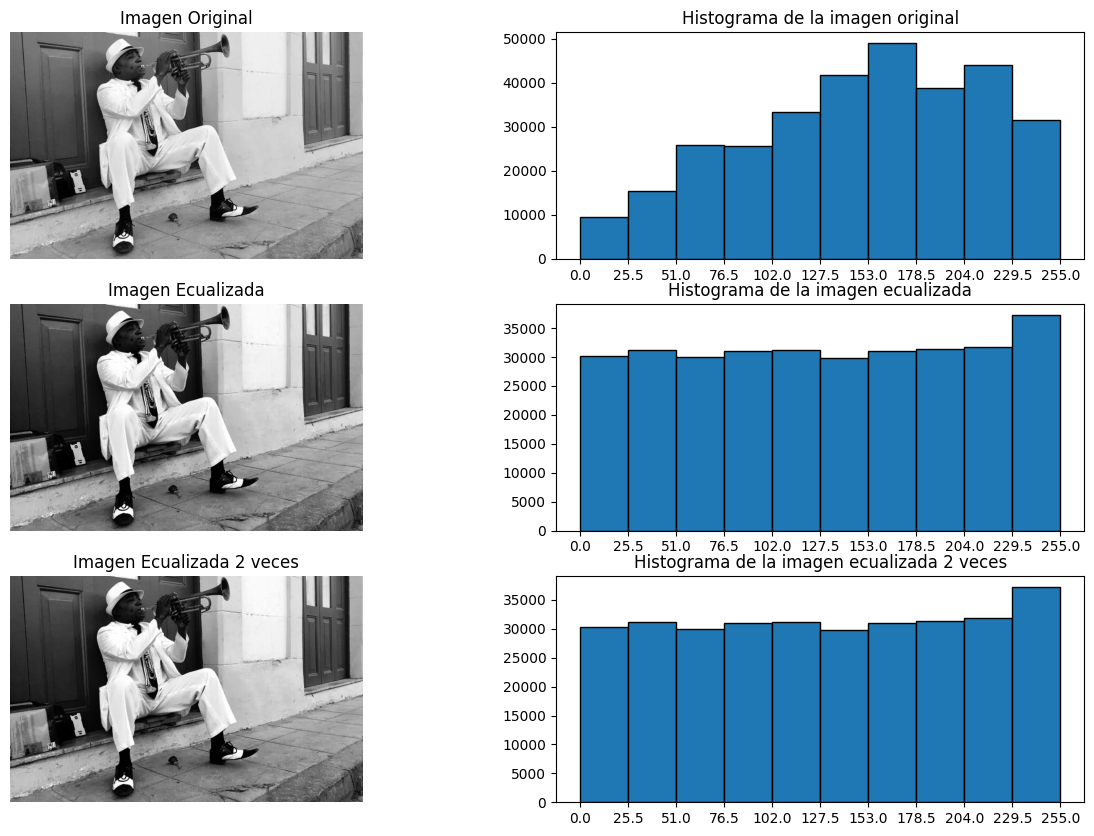

In [331]:
ecualizo_dos_veces(imagen)

## Modificacion del histograma

In [332]:
# Función para modificar el histograma utilizando la solución analítica de la clase

# Crear matriz D bidiagonal para la suavización
def crear_matriz_D(n):
    D = np.zeros((n, n))
    for i in range(n-1):
        D[i, i] = 1
        D[i, i+1] = -1
    return D

def modificar_histograma(h0, lambda_val, gamma_val,u):
    # Matrices a usar
    I = np.eye(h0.shape[0])
    D = crear_matriz_D(h0.shape[0])

    # Solución cerrada para la modificación del histograma
    term1 = (1 + lambda_val) * I + gamma_val * np.dot(D.T,D)
    inv_term1 = np.linalg.inv(term1)
    term2 = h0 + lambda_val * u

    h_mono = np.dot(inv_term1, term2)

    return h_mono

0

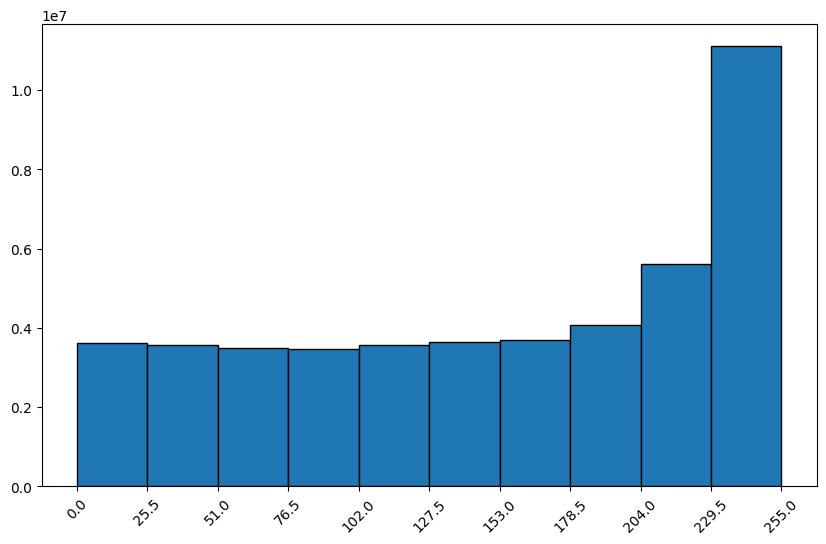

In [333]:
# Histograma original
h0 = calculo_histograma(imagen,10)

# Histograma uniforme
u = np.ones_like(h0) * np.sum(h0) / len(h0)

plotear_histograma(modificar_histograma(h0,1,1,u))

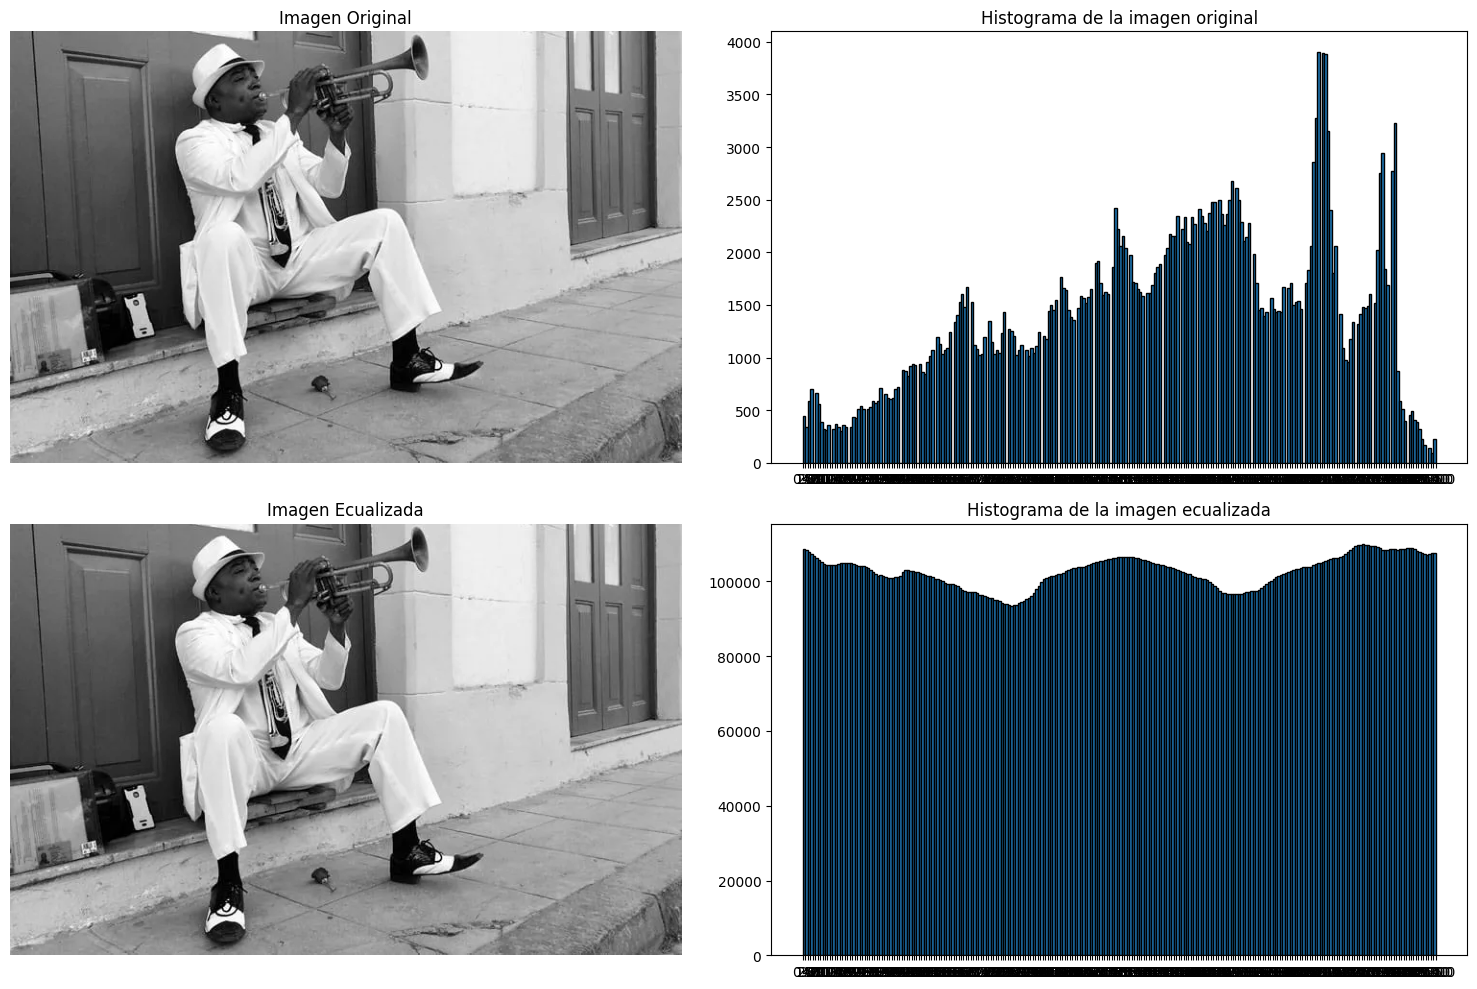

In [334]:
# Histograma original
h0 = calculo_histograma(imagen,256)

# Histograma uniforme
u = np.ones_like(h0) * np.sum(h0) / len(h0)

# Modificar histograma
histograma_modificado = modificar_histograma(h0,1,1,u)

# Ecualizar histograma
histograma_ecualizado = ecualizacion(histograma_modificado)
histograma_ecualizado = np.array(histograma_ecualizado)*255
histograma_ecualizado = histograma_ecualizado.astype('uint8')

"""
# Mostrar los resultados
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(imagen, cmap='gray')
axs[0, 0].set_title('Imagen Original')
axs[0, 0].axis('off')

axs[0, 1].plot(h0)
axs[0, 1].set_title('Histograma Original')
axs[1, 0].imshow(histograma(imagen,10), cmap='gray')
axs[1, 0].set_title('Imagen Modificada')
axs[1, 0].axis('off')

axs[1, 1].plot()
axs[1, 1].set_title('Histograma Modificado')
axs[1, 1].imshow(plotear_histograma(histograma_modificado,10), cmap='gray')
axs[1, 1].set_title('Imagen Ecualizada')
axs[1, 1].axis('off')
"""

## Muestro las imagenes y sus histogramas
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0,0].imshow(imagen, cmap='gray')
axs[0,0].set_title('Imagen Original')
axs[0,0].axis('off')

histograma_normal = calculo_histograma(frecuencias(imagen),256)
x_bins = np.linspace(0, 255, len(histograma_normal) + 1)
axs[0,1].bar(x_bins[:-1], histograma_normal, width=np.diff(x_bins), edgecolor="black", align="edge")
axs[0,1].set_xticks(x_bins)
axs[0,1].set_title('Histograma de la imagen original')

imagen_modificada_ecualizada = histograma_ecualizado[imagen]
axs[1,0].imshow(imagen_modificada_ecualizada, cmap='gray')
axs[1,0].set_title('Imagen Ecualizada')
axs[1,0].axis('off')

axs[1,1].bar(x_bins[:-1], histograma_modificado, width=np.diff(x_bins), edgecolor="black", align="edge")
axs[1,1].set_xticks(x_bins)
axs[1,1].set_title('Histograma de la imagen ecualizada')

plt.tight_layout()
plt.show()

Mostramos primero el histograma original y luego el histograma modificado

0
0


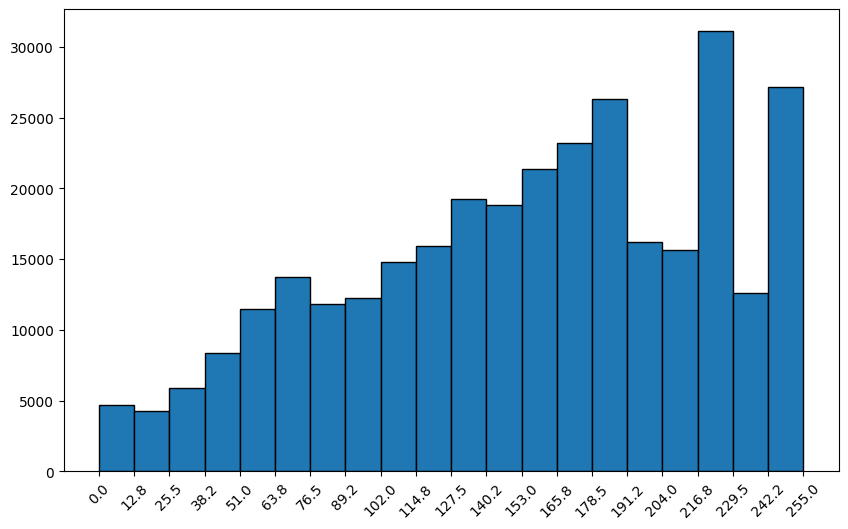

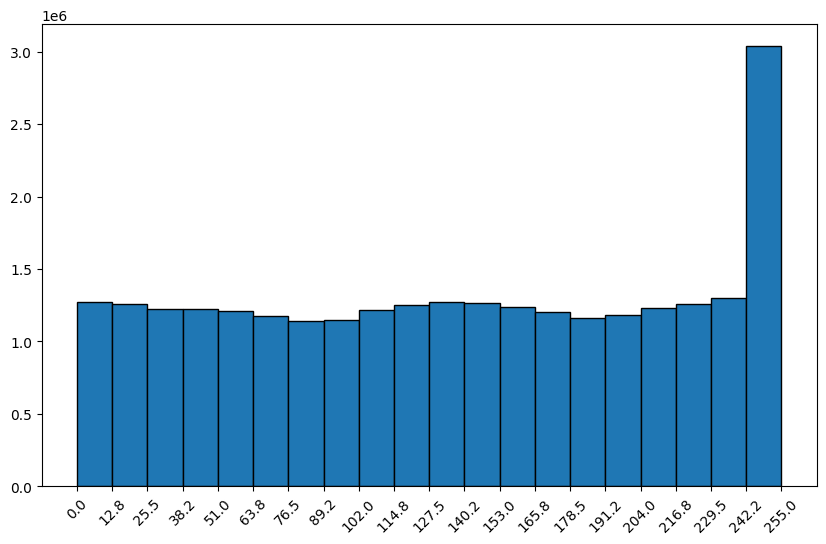

In [335]:
hist_nor = plotear_histograma(calculo_histograma(histograma_normal, 20))
hist_mod = plotear_histograma(calculo_histograma(histograma_modificado, 20))

print(hist_nor)
print(hist_mod)